# EDA : Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Student Depression Dataset.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Convert 'Sleep Duration' to numerical values
sleep_mapping = {
    "Less than 5 hours": 4,
    "5-6 hours": 5.5,
    "7-8 hours": 7.5,
    "More than 8 hours": 9
}
df["Sleep Duration"] = df["Sleep Duration"].map(sleep_mapping)

# Convert categorical variables to numeric
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Family History of Mental Illness"] = df["Family History of Mental Illness"].map({"No": 0, "Yes": 1})
df["Have you ever had suicidal thoughts ?"] = df["Have you ever had suicidal thoughts ?"].map({"No": 0, "Yes": 1})

# Fill missing values in Financial Stress with median
df["Financial Stress"].fillna(df["Financial Stress"].median(), inplace=True)

# Display cleaned dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  int64  
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27883 non-null  float64
 11  Di

In [2]:
# Summary statistics for numerical columns
print(df.describe())

# Unique values in categorical columns
print(df.select_dtypes(include=['object']).nunique())


                  id        Gender           Age  Academic Pressure  \
count   27901.000000  27901.000000  27901.000000       27901.000000   
mean    70442.149421      0.442780     25.822300           3.141214   
std     40641.175216      0.496724      4.905687           1.381465   
min         2.000000      0.000000     18.000000           0.000000   
25%     35039.000000      0.000000     21.000000           2.000000   
50%     70684.000000      0.000000     25.000000           3.000000   
75%    105818.000000      1.000000     30.000000           4.000000   
max    140699.000000      1.000000     59.000000           5.000000   

       Work Pressure          CGPA  Study Satisfaction  Job Satisfaction  \
count   27901.000000  27901.000000        27901.000000      27901.000000   
mean        0.000430      7.656104            2.943837          0.000681   
std         0.043992      1.470707            1.361148          0.044394   
min         0.000000      0.000000            0.000000  

In [4]:
# Drop rows with missing values
df_cleaned = df.dropna()

# Verify no missing values remain
print(df_cleaned.isnull().sum().sum())  # Should print 0


0


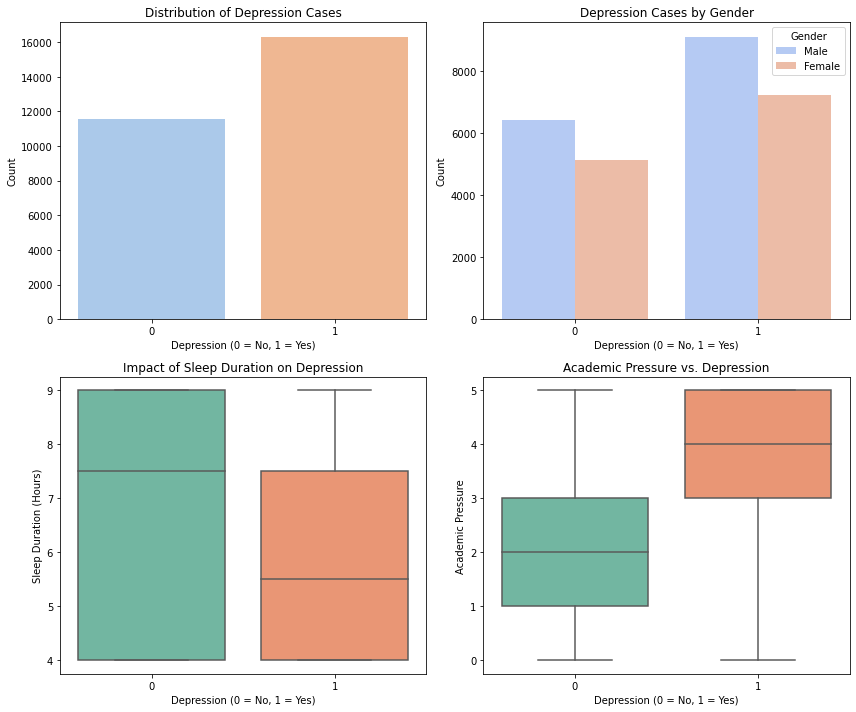

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns and titles for visualization
plots = [
    ("Depression", None, "Distribution of Depression Cases", "Depression (0 = No, 1 = Yes)", "Count"),
    ("Depression", "Gender", "Depression Cases by Gender", "Depression (0 = No, 1 = Yes)", "Count"),
    ("Depression", "Sleep Duration", "Impact of Sleep Duration on Depression", "Depression (0 = No, 1 = Yes)", "Sleep Duration (Hours)"),
    ("Depression", "Academic Pressure", "Academic Pressure vs. Depression", "Depression (0 = No, 1 = Yes)", "Academic Pressure")
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Loop through plots
for i, (x_col, y_col, title, xlabel, ylabel) in enumerate(plots):
    ax = axes[i]
    if y_col is None:
        sns.countplot(x=x_col, data=df_cleaned, palette="pastel", ax=ax)
    elif y_col == "Gender":
        sns.countplot(x=x_col, hue=y_col, data=df_cleaned, palette="coolwarm", ax=ax)
        ax.legend(title="Gender", labels=["Male", "Female"])
    else:
        sns.boxplot(x=x_col, y=y_col, data=df_cleaned, palette="Set2", ax=ax)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Adjust layout
plt.tight_layout()
plt.show()


# Correlation Analysis

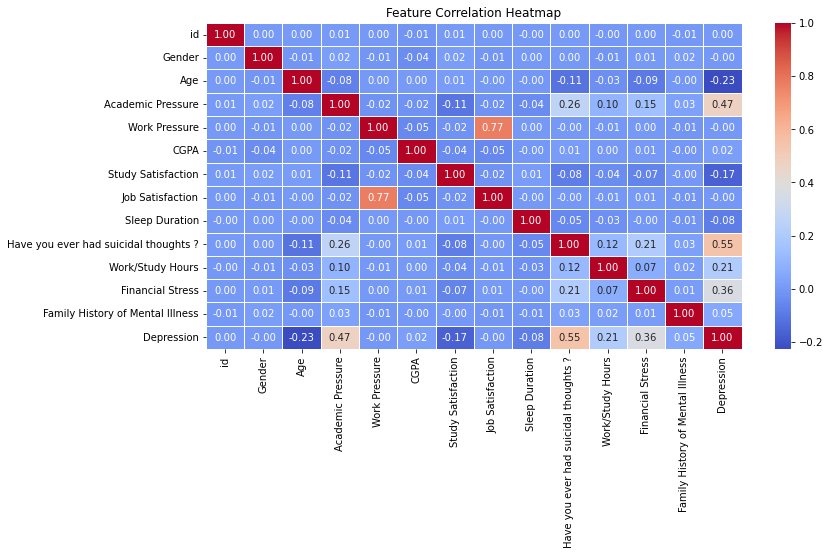

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature Importance

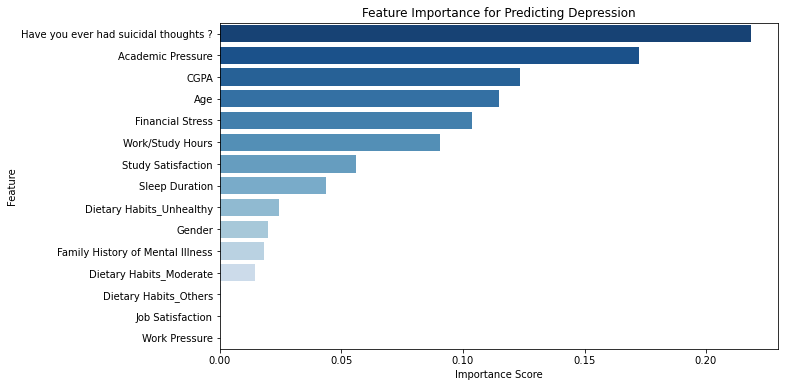

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Select features and target variable
X = df_cleaned.drop(columns=["Depression", "id", "City", "Degree", "Profession"])  # Drop non-numeric/irrelevant columns
y = df_cleaned["Depression"]

# Convert categorical variables to numerical (if needed)
X = pd.get_dummies(X, drop_first=True)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="Blues_r")
plt.title("Feature Importance for Predicting Depression")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


# Hypothesis Testing

In [9]:
from scipy.stats import ttest_ind

# Split dataset into depressed vs. non-depressed students
depressed = df_cleaned[df_cleaned["Depression"] == 1]["Academic Pressure"]
non_depressed = df_cleaned[df_cleaned["Depression"] == 0]["Academic Pressure"]

# Perform independent t-test
t_stat, p_value = ttest_ind(depressed, non_depressed)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Academic Pressure has a statistically significant effect on Depression.")
else:
    print("No significant difference found in Academic Pressure between depressed and non-depressed students.")


T-statistic: 90.11, P-value: 0.00000
Academic Pressure has a statistically significant effect on Depression.


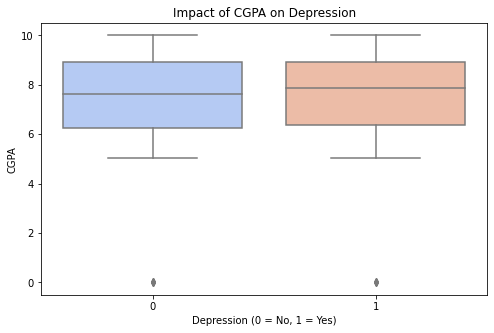

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x="Depression", y="CGPA", data=df_cleaned, palette="coolwarm")
plt.title("Impact of CGPA on Depression")
plt.xlabel("Depression (0 = No, 1 = Yes)")
plt.ylabel("CGPA")
plt.show()


In [14]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(df_cleaned[df_cleaned["Depression"] == 1]["CGPA"],
                            df_cleaned[df_cleaned["Depression"] == 0]["CGPA"])

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("CGPA has a statistically significant effect on Depression.")
else:
    print("No significant difference in CGPA between depressed and non-depressed students.")


T-statistic: 3.67, P-value: 0.00024
CGPA has a statistically significant effect on Depression.


Depression
0    6.530417
1    6.202732
Name: Sleep Duration, dtype: float64


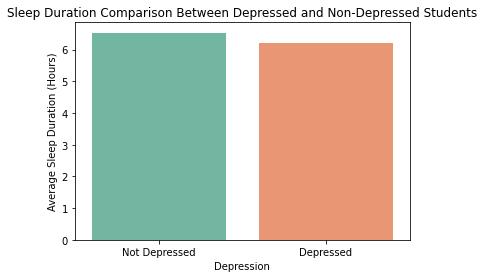

In [11]:
# Calculate mean sleep duration for each group
sleep_means = df_cleaned.groupby("Depression")["Sleep Duration"].mean()

print(sleep_means)

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=sleep_means.index, y=sleep_means.values, palette="Set2")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.ylabel("Average Sleep Duration (Hours)")
plt.title("Sleep Duration Comparison Between Depressed and Non-Depressed Students")
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Perform independent t-test
t_stat, p_value = ttest_ind(df_cleaned[df_cleaned["Depression"] == 1]["Sleep Duration"],
                            df_cleaned[df_cleaned["Depression"] == 0]["Sleep Duration"])

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.5f}")

# Interpretation
if p_value < 0.05:
    print("Sleep Duration has a statistically significant effect on Depression.")
else:
    print("No significant difference in Sleep Duration between depressed and non-depressed students.")


T-statistic: -14.11, P-value: 0.00000
Sleep Duration has a statistically significant effect on Depression.


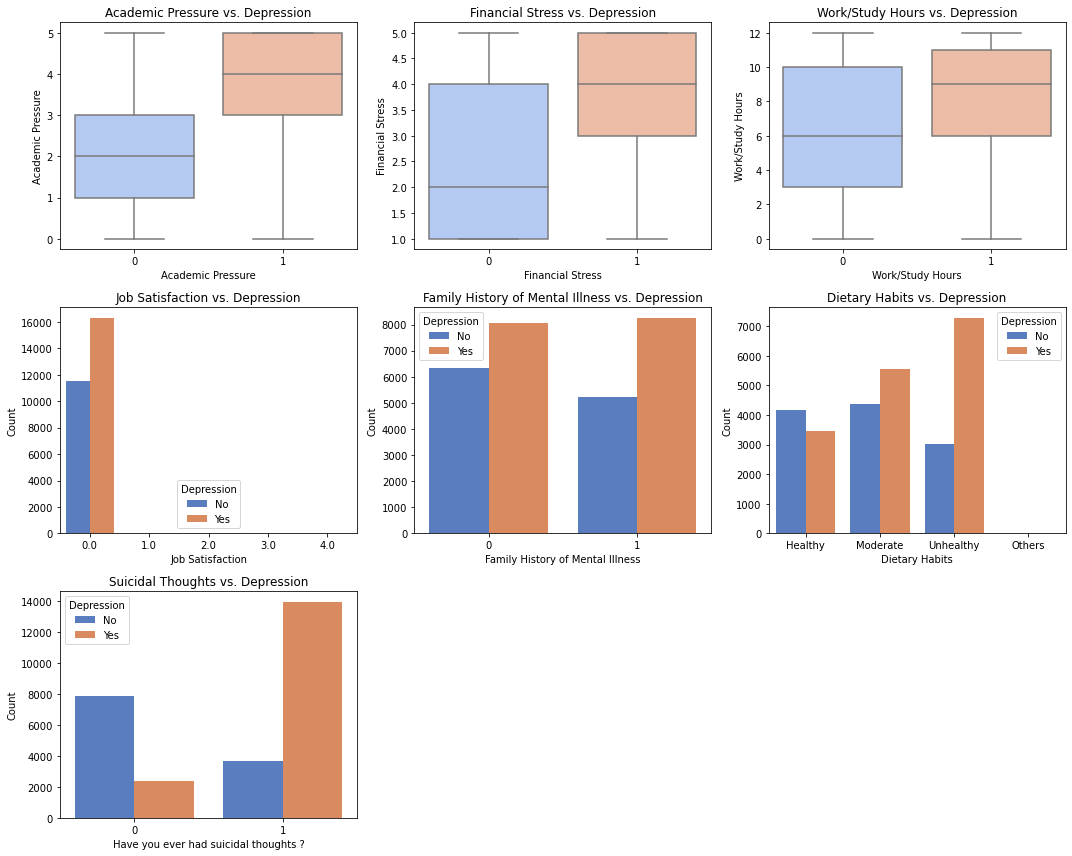

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features and their visualization types
visuals = [
    ("Academic Pressure", "Depression", "box", "Academic Pressure vs. Depression"),
    ("Financial Stress", "Depression", "box", "Financial Stress vs. Depression"),
    ("Work/Study Hours", "Depression", "box", "Work/Study Hours vs. Depression"),
    ("Job Satisfaction", "Depression", "count", "Job Satisfaction vs. Depression"),
    ("Family History of Mental Illness", "Depression", "count", "Family History of Mental Illness vs. Depression"),
    ("Dietary Habits", "Depression", "count", "Dietary Habits vs. Depression"),
    ("Have you ever had suicidal thoughts ?", "Depression", "count", "Suicidal Thoughts vs. Depression"),
]

# Set up subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

# Loop through each feature and create plots dynamically
for i, (x_col, y_col, plot_type, title) in enumerate(visuals):
    ax = axes[i]
    
    if plot_type == "box":
        sns.boxplot(x=y_col, y=x_col, data=df_cleaned, palette="coolwarm", ax=ax)
    elif plot_type == "count":
        sns.countplot(x=x_col, hue=y_col, data=df_cleaned, palette="muted", ax=ax)
        ax.legend(title="Depression", labels=["No", "Yes"])

    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel("Count" if plot_type == "count" else x_col)

# Adjust layout and remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete extra subplots if not used

plt.tight_layout()
plt.show()


# Predictive Modeling : Data preprocessing

In [23]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Select the most relevant features
features = [
    "Academic Pressure",
    "Financial Stress",
    "Work/Study Hours",
    "Job Satisfaction",
    "Family History of Mental Illness",
    "Dietary Habits",
    "Have you ever had suicidal thoughts ?"
]

# Convert categorical features into numerical
df_ml = df_cleaned[features + ["Depression"]]
df_ml = pd.get_dummies(df_ml, drop_first=True)  # One-Hot Encoding

# Define features (X) and target variable (y)
X = df_ml.drop(columns=["Depression"])
y = df_ml["Depression"]

# Split the dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print(f"Training Set: {X_train.shape}, Test Set: {X_test.shape}")


Training Set: (22306, 9), Test Set: (5577, 9)


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select the most relevant features
features = [
    "Academic Pressure",
    "Financial Stress",
    "Work/Study Hours",
    "Job Satisfaction",
    "Family History of Mental Illness",
    "Dietary Habits",
    "Have you ever had suicidal thoughts ?"
]

# Convert categorical features into numerical
df_ml = df_cleaned[features + ["Depression"]]
df_ml = pd.get_dummies(df_ml, drop_first=True)  # One-Hot Encoding

# Define features (X) and target variable (y)
X = df_ml.drop(columns=["Depression"])
y = df_ml["Depression"]

# Split dataset into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train, predict, and evaluate both models
results = {}
for model_name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Store performance metrics
    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

# Display comparison results
for model_name, metrics in results.items():
    print(f"\n🔹 Model: {model_name}")
    print(f"✅ Accuracy: {metrics['Accuracy']:.4f}")
    print("📊 Classification Report:")
    print(classification_report(y_test, models[model_name].predict(X_test)))



🔹 Model: Logistic Regression
✅ Accuracy: 0.8352
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2303
           1       0.85      0.88      0.86      3274

    accuracy                           0.84      5577
   macro avg       0.83      0.83      0.83      5577
weighted avg       0.83      0.84      0.83      5577


🔹 Model: Random Forest
✅ Accuracy: 0.8121
📊 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      2303
           1       0.83      0.86      0.84      3274

    accuracy                           0.81      5577
   macro avg       0.81      0.80      0.80      5577
weighted avg       0.81      0.81      0.81      5577



# Random forest hyperparameter optimizer

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# Initialize Grid Search with Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy", n_jobs=-1)

# Train with best parameters
rf_grid.fit(X_train, y_train)

# Best model evaluation
best_rf = rf_grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print(f"Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_best_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))


Optimized Random Forest Accuracy: 0.8334

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      2303
           1       0.85      0.88      0.86      3274

    accuracy                           0.83      5577
   macro avg       0.83      0.82      0.83      5577
weighted avg       0.83      0.83      0.83      5577



In [28]:
from xgboost import XGBClassifier

# Train XGBoost model
xgb_model = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate model
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.8375

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      2303
           1       0.85      0.88      0.86      3274

    accuracy                           0.84      5577
   macro avg       0.83      0.83      0.83      5577
weighted avg       0.84      0.84      0.84      5577



# Model Comparison

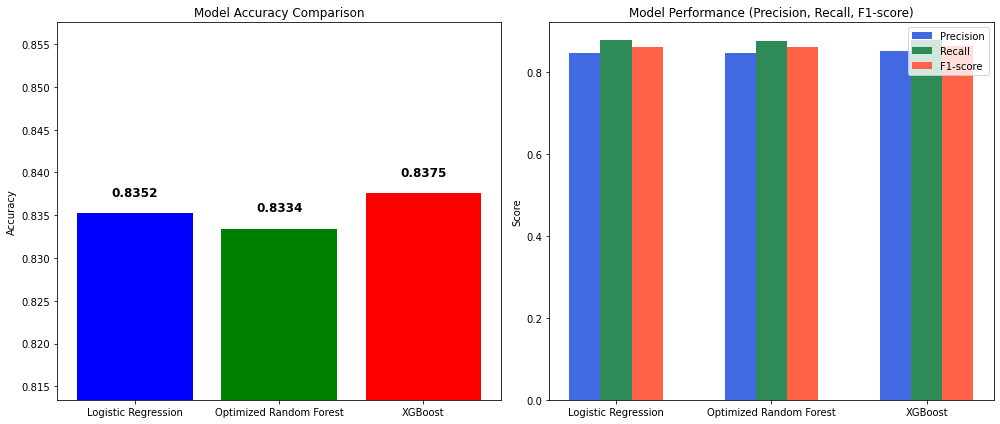

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Store model results dynamically
model_results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, models["Logistic Regression"].predict(X_test)),
        "Precision": classification_report(y_test, models["Logistic Regression"].predict(X_test), output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, models["Logistic Regression"].predict(X_test), output_dict=True)["1"]["recall"],
        "F1-score": classification_report(y_test, models["Logistic Regression"].predict(X_test), output_dict=True)["1"]["f1-score"],
    },
    "Optimized Random Forest": {
        "Accuracy": accuracy_score(y_test, best_rf.predict(X_test)),
        "Precision": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["1"]["recall"],
        "F1-score": classification_report(y_test, best_rf.predict(X_test), output_dict=True)["1"]["f1-score"],
    },
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, xgb_model.predict(X_test)),
        "Precision": classification_report(y_test, xgb_model.predict(X_test), output_dict=True)["1"]["precision"],
        "Recall": classification_report(y_test, xgb_model.predict(X_test), output_dict=True)["1"]["recall"],
        "F1-score": classification_report(y_test, xgb_model.predict(X_test), output_dict=True)["1"]["f1-score"],
    }
}

# Extract model names and their metrics
models = list(model_results.keys())
accuracy_scores = [model_results[m]["Accuracy"] for m in models]
precision_scores = [model_results[m]["Precision"] for m in models]
recall_scores = [model_results[m]["Recall"] for m in models]
f1_scores = [model_results[m]["F1-score"] for m in models]

# Set width for bars
bar_width = 0.2
index = np.arange(len(models))

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Accuracy Comparison Plot
axes[0].bar(models, accuracy_scores, color=["blue", "green", "red"])
axes[0].set_title("Model Accuracy Comparison")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(min(accuracy_scores) - 0.02, max(accuracy_scores) + 0.02)
for i, v in enumerate(accuracy_scores):
    axes[0].text(i, v + 0.002, f"{v:.4f}", ha="center", fontsize=12, fontweight="bold")

# Precision, Recall, and F1-score Comparison
axes[1].bar(index - bar_width, precision_scores, bar_width, label="Precision", color="royalblue")
axes[1].bar(index, recall_scores, bar_width, label="Recall", color="seagreen")
axes[1].bar(index + bar_width, f1_scores, bar_width, label="F1-score", color="tomato")

axes[1].set_title("Model Performance (Precision, Recall, F1-score)")
axes[1].set_xticks(index)
axes[1].set_xticklabels(models)
axes[1].set_ylabel("Score")
axes[1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()
